In [12]:
# Task 1: Extract Reviews from Amazon

import requests
from bs4 import BeautifulSoup


url = 'https://www.amazon.com/All-New-release-Smart-speaker-Charcoal/dp/B09B8V1LZ3' 


headers = {
    "User-Agent": "Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/58.0.3029.110 Safari/537.3"
}


response = requests.get(url, headers=headers)
if response.status_code == 200:
    soup = BeautifulSoup(response.content, 'html.parser')


    reviews = soup.find_all('span', {'data-hook': 'review-body'})

    if reviews:
        reviews_list = [review.text.strip() for review in reviews]


        for review in reviews_list:
            print(review)
    else:
        print("No reviews found, or the page structure has changed.")
else:
    print(f"Failed to retrieve the page. Status code: {response.status_code}")


I recently purchased the Echo Dot, and I couldn't be happier with my decision! This smart speaker is a fantastic addition to my home. The sound quality is surprisingly rich and clear for such a compact device, making it perfect for everything from music to podcasts.Setting it up was a breeze, and I love how it seamlessly integrates with my smart home devices. Being able to control my lights, thermostat, and even my coffee maker with just my voice is incredibly convenient. The Alexa voice assistant is responsive and surprisingly intuitive, answering my questions, setting reminders, and helping me manage my schedule effortlessly.I also appreciate the range of skills available, from playing games to accessing news updates. It's like having a personal assistant that makes my daily life easier and more enjoyable. Overall, the Echo Dot is a fantastic purchase that combines functionality with style. Highly recommended for anyone looking to enhance their home with smart technology! It was defi

In [13]:
#  2: Data Preprocessing

import re
import pandas as pd
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer


df = pd.DataFrame(reviews_list, columns=['review_text'])


def clean_text(text):
    text = re.sub(r'[^\w\s]', '', text) 
    text = text.lower()  
    text = ' '.join([word for word in text.split() if word not in stopwords.words('english')])  
    return text

df['cleaned_review'] = df['review_text'].apply(clean_text)


df.head()


,review_text,cleaned_review
0,"I recently purchased the Echo Dot, and I could...",recently purchased echo dot couldnt happier de...
1,"**Amazon Echo Dot (5th Gen, 2022 release) Revi...",amazon echo dot 5th gen 2022 release reviewthe...
2,Smart speaker that packs a punch despite its s...,smart speaker packs punch despite small size s...
3,"I recently upgraded to the Echo Dot 5th Gen, a...",recently upgraded echo dot 5th gen overall im ...


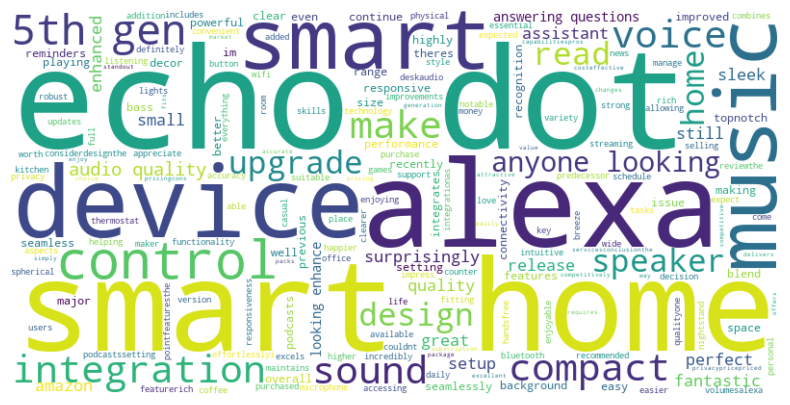

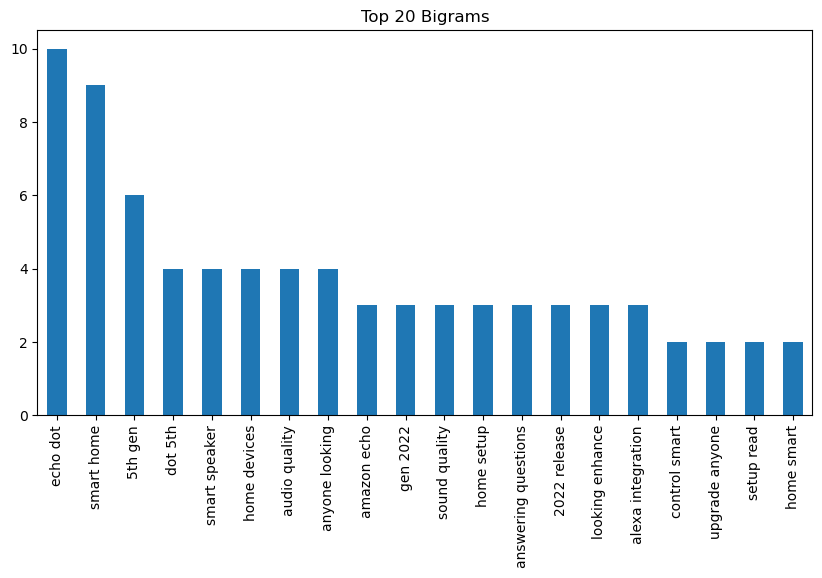

In [14]:
# 3: Exploratory Data Analysis (EDA)

import matplotlib.pyplot as plt
from wordcloud import WordCloud


def plot_wordcloud(text):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.show()

plot_wordcloud(df['cleaned_review'])


bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = bigram_vectorizer.fit_transform(df['cleaned_review'])
bigram_freq = pd.DataFrame(bigrams.toarray(), columns=bigram_vectorizer.get_feature_names_out()).sum().sort_values(ascending=False)


bigram_freq.head(20).plot(kind='bar', figsize=(10, 5))
plt.title('Top 20 Bigrams')
plt.show()


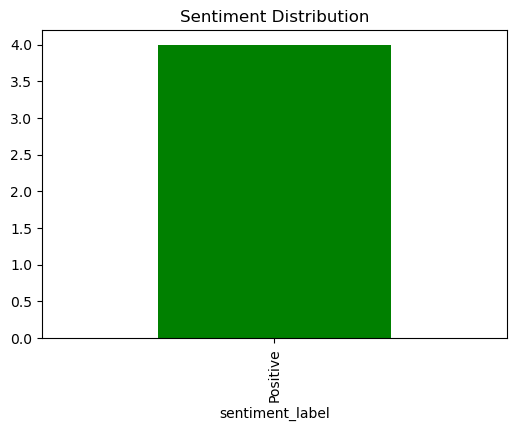

In [15]:
#  4: Sentiment Analysis

from textblob import TextBlob


def get_sentiment(text):
    analysis = TextBlob(text)
    return analysis.sentiment.polarity

df['sentiment'] = df['cleaned_review'].apply(get_sentiment)

# Label reviews as Positive, Neutral, or Negative
df['sentiment_label'] = df['sentiment'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))


df['sentiment_label'].value_counts().plot(kind='bar', color=['green', 'blue', 'red'], figsize=(6, 4))
plt.title('Sentiment Distribution')
plt.show()


In [6]:
# Task 2


import pandas as pd
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')


def extract_reviews_imdb(url):
   
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
   
    reviews = [tag.get_text() for tag in soup.find_all('div', {'class': 'text show-more__control'})]
    return reviews


url = 'https://www.amazon.com/All-New-release-Smart-speaker-Charcoal/dp/B09B8V1LZ3' 
reviews = extract_reviews_imdb(url)


df = pd.DataFrame(reviews, columns=['Review'])


def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text) 
    text = text.lower()  
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))  
    return text

df['Cleaned_Review'] = df['Review'].apply(clean_text)


def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Cleaned_Review'].apply(get_sentiment)


print(df.head())


positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['Cleaned_Review'])
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['Cleaned_Review'])


def generate_wordcloud(text, title):
    if text.strip():  
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')
        plt.title(title)
        plt.show()
    else:
        print(f"No words available to generate the word cloud for {title}.")


generate_wordcloud(positive_reviews, 'Positive Words Word Cloud')
generate_wordcloud(negative_reviews, 'Negative Words Word Cloud')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


Empty DataFrame
Columns: [Review, Cleaned_Review, Sentiment]
Index: []
No words available to generate the word cloud for Positive Words Word Cloud.
No words available to generate the word cloud for Negative Words Word Cloud.


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\DELL\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


                                              Review  \
0  We offer easy, convenient returns with at leas...   
1   Link this device to your Amazon account to en...   
2   If you already have a qualifying Amazon devic...   
3   This product has sustainability features reco...   
4   Carbon emissions from the lifecycle of this p...   

                                      Cleaned_Review Sentiment  
0  offer easy convenient returns least one free r...  Positive  
1  link device amazon account enable frustrationf...   Neutral  
2  already qualifying amazon device connected hom...  Positive  
3  product sustainability features recognized tru...   Neutral  
4  carbon emissions lifecycle product reduced com...  Negative  


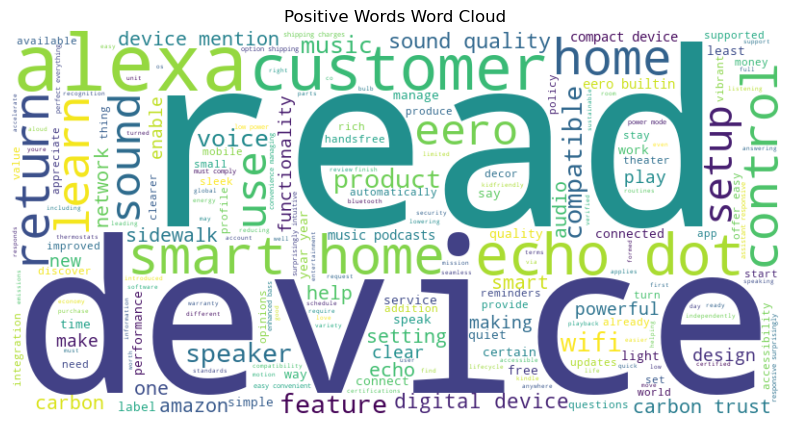

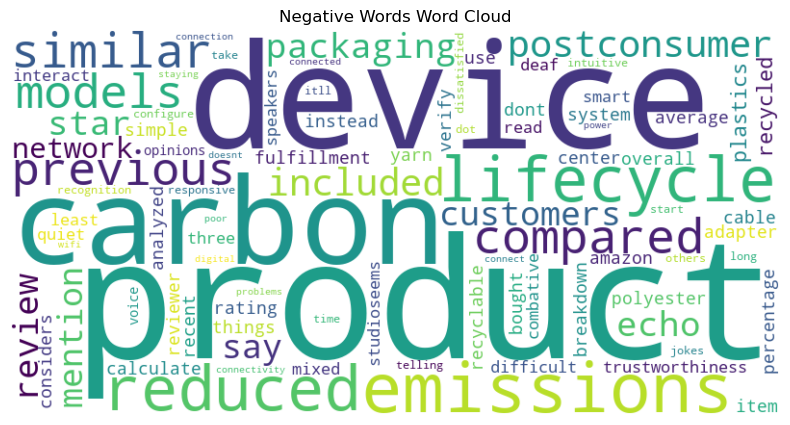

In [2]:
# Task 3

import pandas as pd
import requests
from bs4 import BeautifulSoup
from textblob import TextBlob
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import re
import nltk
from nltk.corpus import stopwords


nltk.download('stopwords')
nltk.download('punkt')


def extract_reviews(url):
    response = requests.get(url)
    soup = BeautifulSoup(response.content, 'html.parser')
    
    
    reviews = [tag.get_text() for tag in soup.find_all('p')]
    return reviews


url = 'https://www.amazon.com/All-New-release-Smart-speaker-Charcoal/dp/B09B8V1LZ3'
reviews = extract_reviews(url)


df = pd.DataFrame(reviews, columns=['Review'])


def clean_text(text):
    text = re.sub(r'[^a-zA-Z\s]', '', text)  
    text = text.lower()  
    text = ' '.join(word for word in text.split() if word not in stopwords.words('english'))  
    return text

df['Cleaned_Review'] = df['Review'].apply(clean_text)


def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0:
        return 'Positive'
    elif analysis.sentiment.polarity < 0:
        return 'Negative'
    else:
        return 'Neutral'

df['Sentiment'] = df['Cleaned_Review'].apply(get_sentiment)


print(df.head())


positive_reviews = ' '.join(df[df['Sentiment'] == 'Positive']['Cleaned_Review'])
negative_reviews = ' '.join(df[df['Sentiment'] == 'Negative']['Cleaned_Review'])


def generate_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

generate_wordcloud(positive_reviews, 'Positive Words Word Cloud')
generate_wordcloud(negative_reviews, 'Negative Words Word Cloud')
